# BIOS512 Final Project
### Sara O'Brien

## `Data source`

The data used for the following data narrative comes from [The Covid Prison Project](https://covidprisonproject.com/), an initiative tracking COVID-19 prison data across all 50 US states, Puerto Rico, the Federal Bureau of Prisons, and Immigration and Customs Enforcement (ICE). A group of public health researchers have created a public-facing database to capture this tracked data. This project will pull specifically from the ICE data available via [GitHub](https://github.com/healthandjustice/covid-prison-project), which was most recently updated on 6/21/21. 

## `Creating the dataframe `

The goal of the the first part of the data analysis is to create a data frame with only the information of interest for the narrative. The entire ICE dataset has 21 variables and 45,500 observations, of which only a portion will be analyzed. The steps for creating the data frame are numbered and detailed in the comments of the code below:

In [6]:
# 1. Load libraries
library(tidyverse)
library(readxl)
library(ggrepel)

# 2. Read in the CPP ICE data (on sheet 14 of the xls)
ice = read_excel('CPP_long_6-21-21.xlsx', sheet = 14)

# 3. View column names
ice %>% colnames

# 4. Replace missing values with zero for the quantitative variable of interest (fac_inc_positive)
ice <- ice %>% mutate(fac_inc_positive = ifelse(is.na(fac_inc_positive), 0, fac_inc_positive))

# 5. Determine the top 6 ICE facilities for number of positive inmates
ice %>%
    filter(scrapedate == '2021-06-17') %>%
    slice_max(fac_inc_positive, n=6) %>% 
    pull(facility)

# 6. Determine the most recent date of data collection available
ice %>%
    summarize(max.scrapedate = max(scrapedate))

[1] "scrapedate"         "lastupdated"        "stateagency"       
 [4] "facility"           "fac_inc_positive"   "fac_inc_active"    
 [7] "fac_inc_deaths"     "fac_staff_positive" "sum_inc_population"
[10] "sum_inc_tested"     "sum_staff_deaths"   "fac_state"         
[13] "fac_city"           "fac_address"        "fac_zip"           
[16] "sum_inc_pop"        "sum_inc_positive"   "sum_inc_deaths"    
[19] "sum_staff_positive" "match"              "oldnew"

[1] "La Palma Correctional Facility"                
[2] "South Texas Family Residential Center (Dilley)"
[3] "South Texas ICE Processing Center (Pearsall)"  
[4] "Eloy Federal Contract Facility"                
[5] "Stewart Detention Center"                      
[6] "Port Isabel Detention Center"

max.scrapedate
<dttm>
2021-06-17


In [104]:
# 7. Lastly, use the filter and select functions to use the information pulled from steps 3-6 and narrow the data frame
ice_df = ice %>% 
    select(scrapedate, facility, fac_inc_positive) %>%
    filter(scrapedate == '2020-07-17' |
           scrapedate == '2020-08-17' |
           scrapedate == '2020-09-17' |
           scrapedate == '2020-10-17' |
           scrapedate == '2020-11-17' |
           scrapedate == '2020-12-17' |
           scrapedate == '2021-01-17' |
           scrapedate == '2021-02-17' |
           scrapedate == '2021-03-17' |
           scrapedate == '2021-04-17' |
           scrapedate == '2021-05-17' |
           scrapedate == '2021-06-17' ) %>%
    filter(facility %in% c("La Palma Correctional Facility", 
                   "South Texas Family Residential Center (Dilley)", 
                   "South Texas ICE Processing Center (Pearsall)", 
                   "Eloy Federal Contract Facility", 
                   "Stewart Detention Center", 
                   "Port Isabel Detention Center"))

# 8. Preview the new data frame
ice_df %>% head

scrapedate,facility,fac_inc_positive
<dttm>,<chr>,<dbl>
2020-07-17,Eloy Federal Contract Facility,252
2020-07-17,La Palma Correctional Facility,102
2020-07-17,Port Isabel Detention Center,92
2020-07-17,South Texas Family Residential Center (Dilley),0
2020-07-17,South Texas ICE Processing Center (Pearsall),120
2020-07-17,Stewart Detention Center,111


## `Visualizing the distribution of confirmed cases`

Before creating visualizations for the number of cases over time by facility, it is important to understand how the distribution of cases has changed over time. Grouping by date and plotting boxplots of the fac_inc_positive variable will reveal this distribution. 

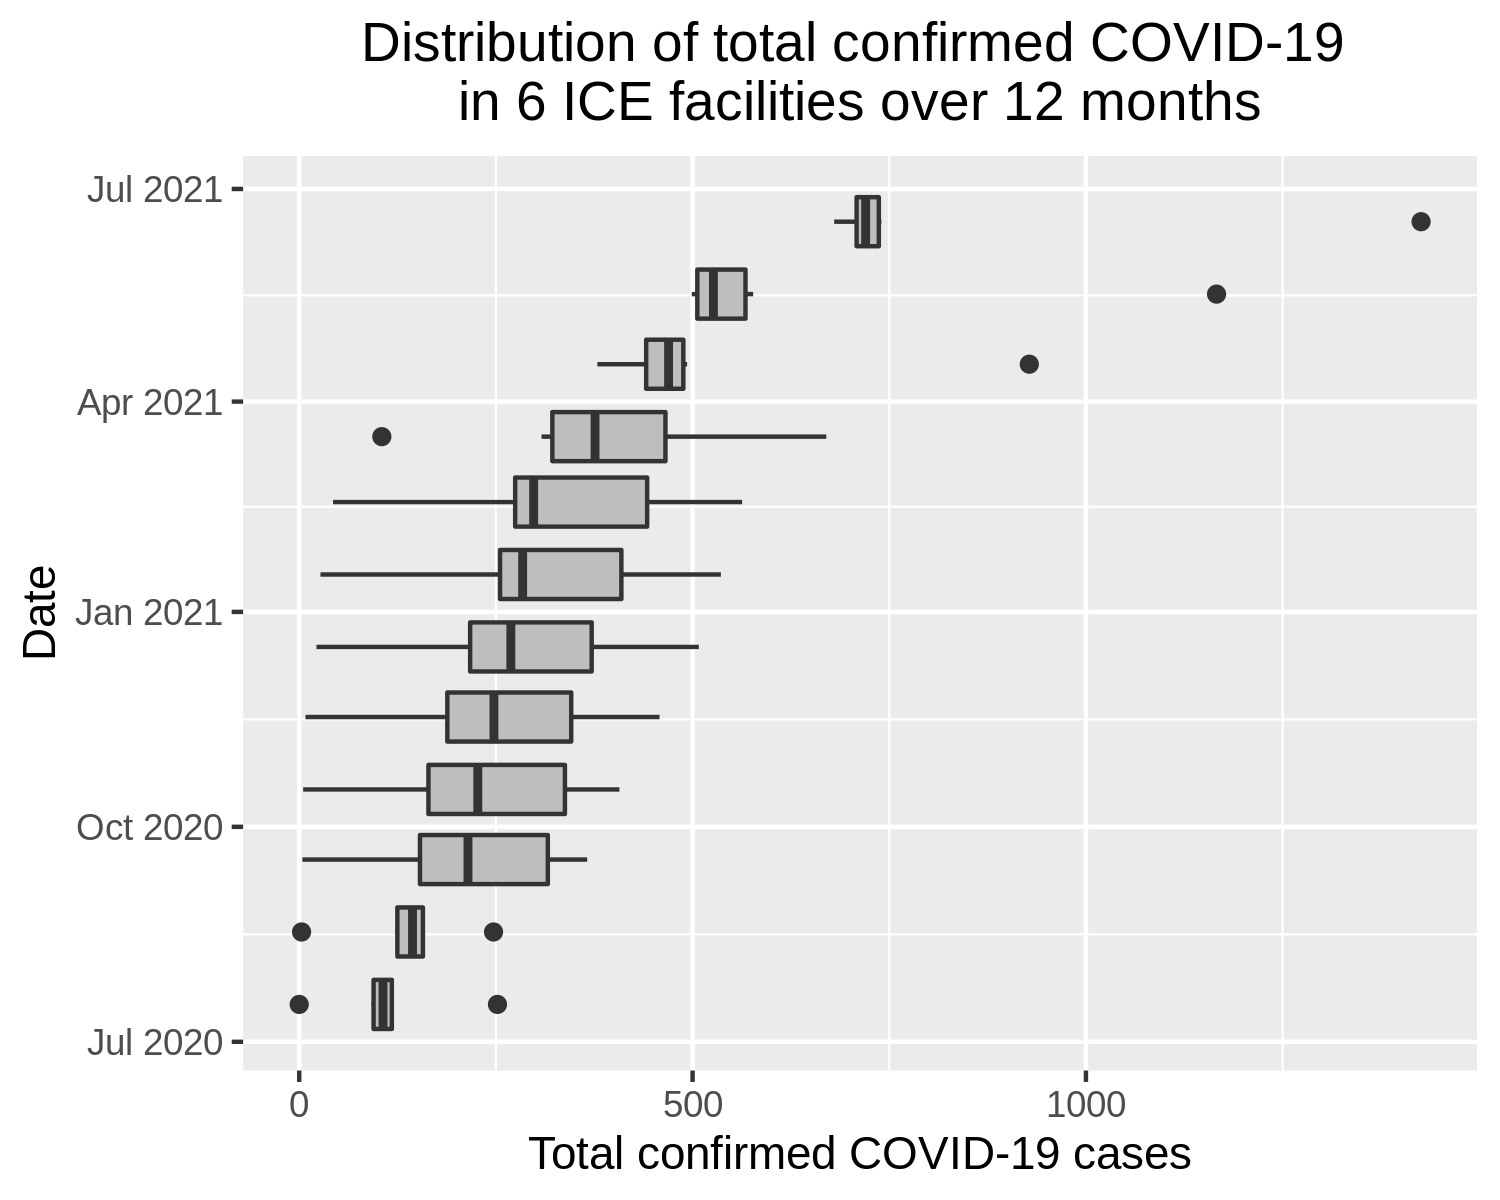

In [110]:
options(repr.plot.width=5, repr.plot.height=4)

p = ggplot(ice_df, aes(x = fac_inc_positive, y = scrapedate, group = scrapedate)) 

p = p + geom_boxplot(fill='grey') 

p = p + labs(title = "Distribution of total confirmed COVID-19 
in 6 ICE facilities over 12 months",
             y = "Date", 
             x = "Total confirmed COVID-19 cases")

p = p + theme_grey()

p = p + theme(plot.title = element_text(hjust = 0.5))

p

## `Visualizing the number of confirmed cases over time`

The number of confirmed cases over time can be visualized in two different ways: 
1. Mapping date to the x-axis, number of cases to the y-axis, and coloring line graphs by facility.
2. Mapping date to the x-axis, number of cases to the y-axis, and facetting the plot by facility.

Both visualizations display the same information.

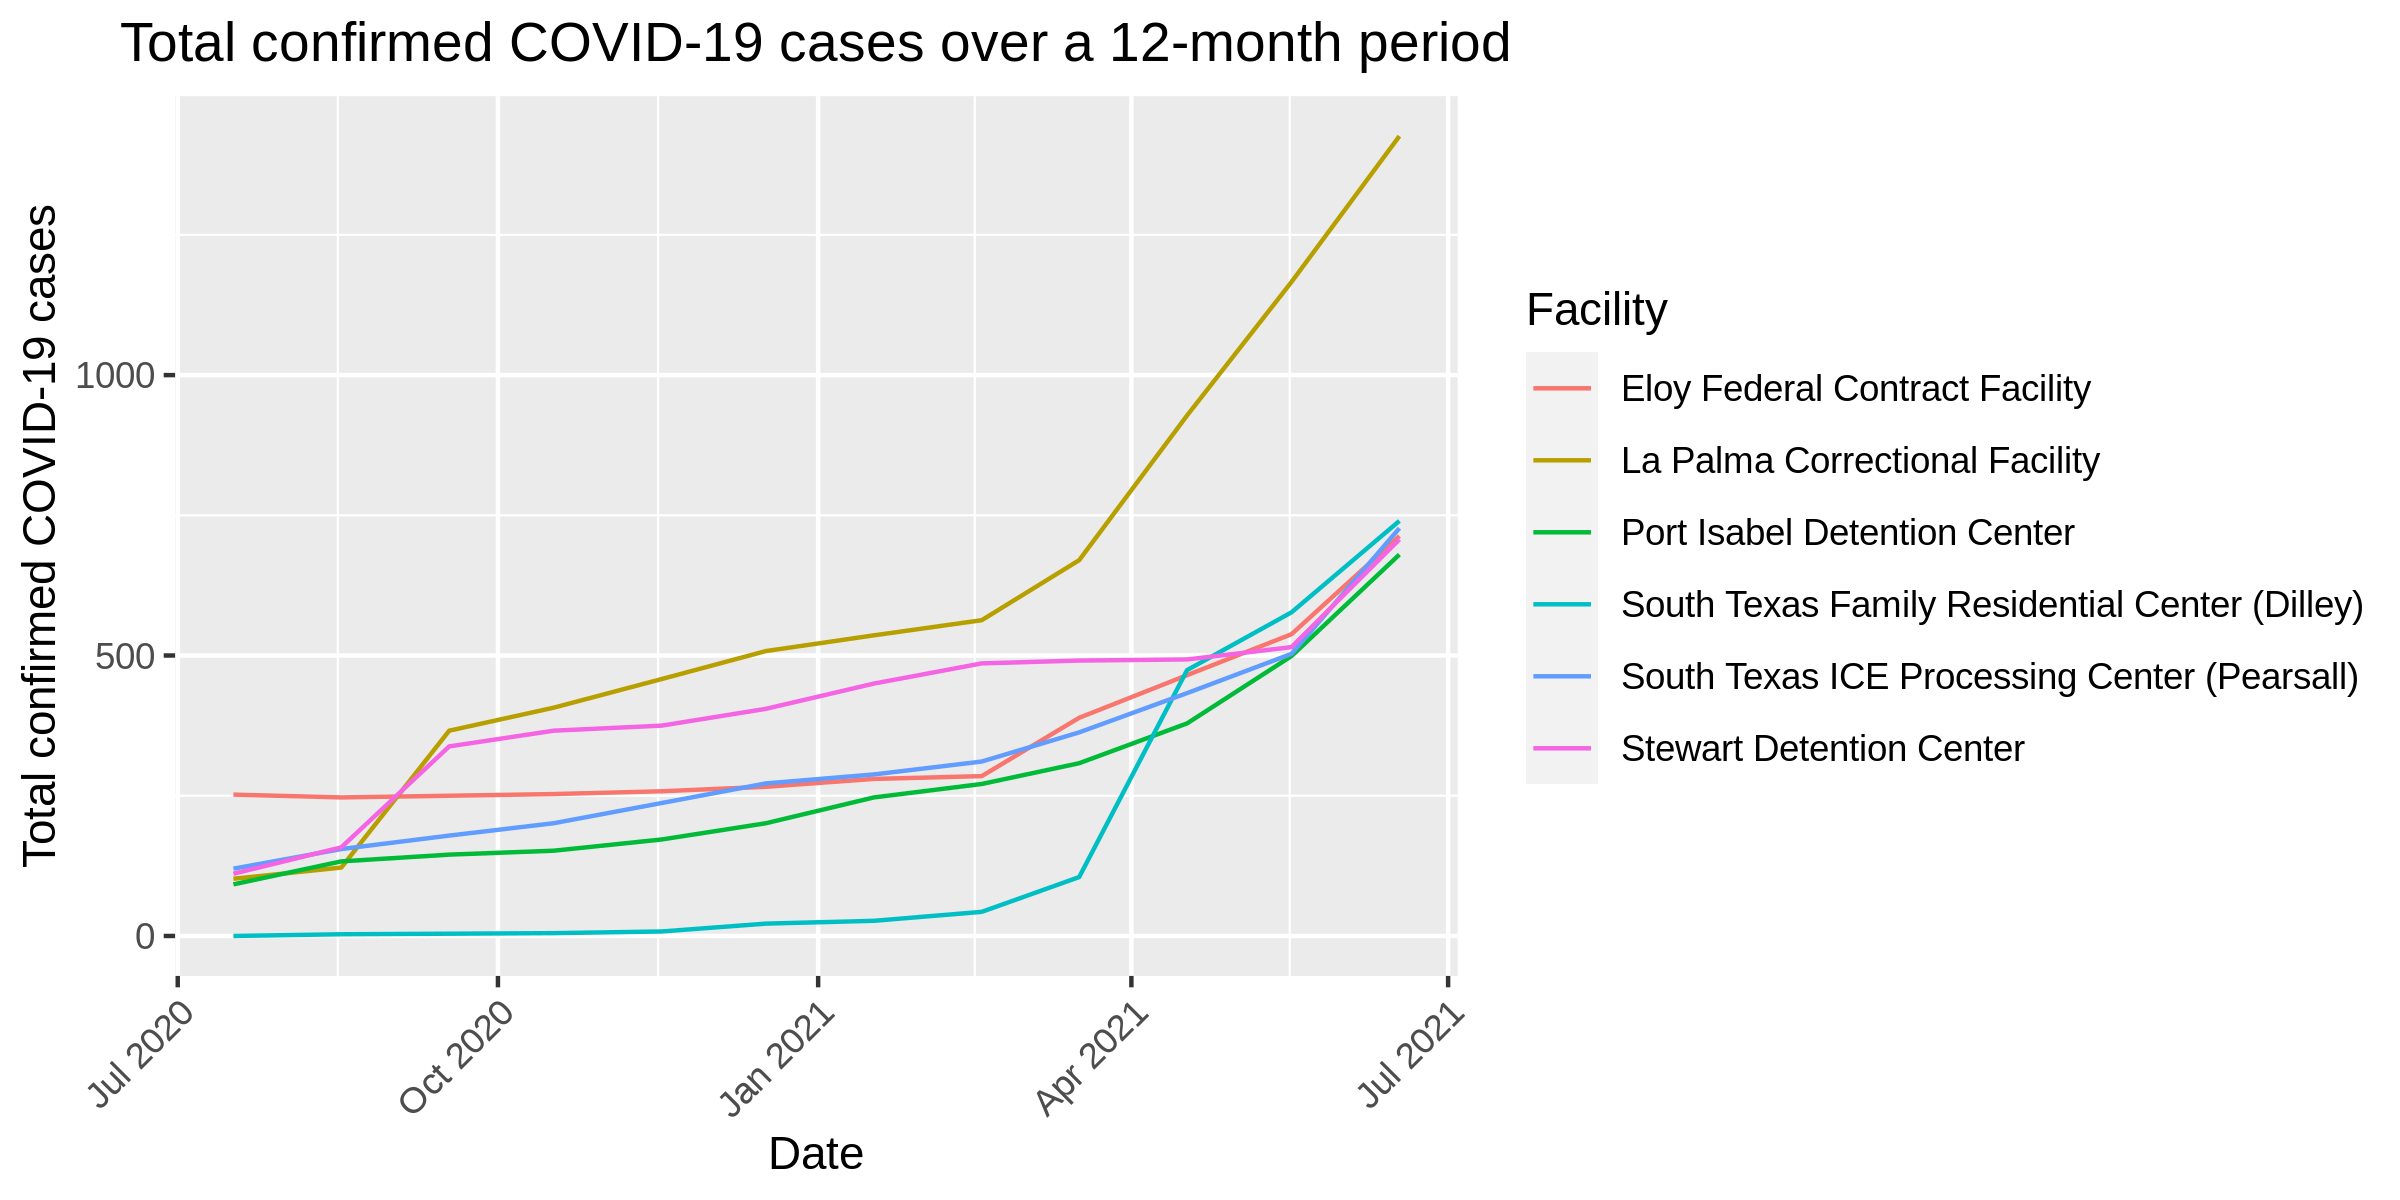

In [106]:
options(repr.plot.width=8, repr.plot.height=4)

p = ggplot(ice_df, aes(x=scrapedate, y=fac_inc_positive, color=facility)) + geom_line()

p = p + labs(title = "Total confirmed COVID-19 cases over a 12-month period",
             x = "Date", 
             y = "Total confirmed COVID-19 cases", 
               color = "Facility")

p = p + theme_grey()

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1),
               panel.spacing = unit(2, "lines"),
               plot.title = element_text(hjust = 0.5))

p

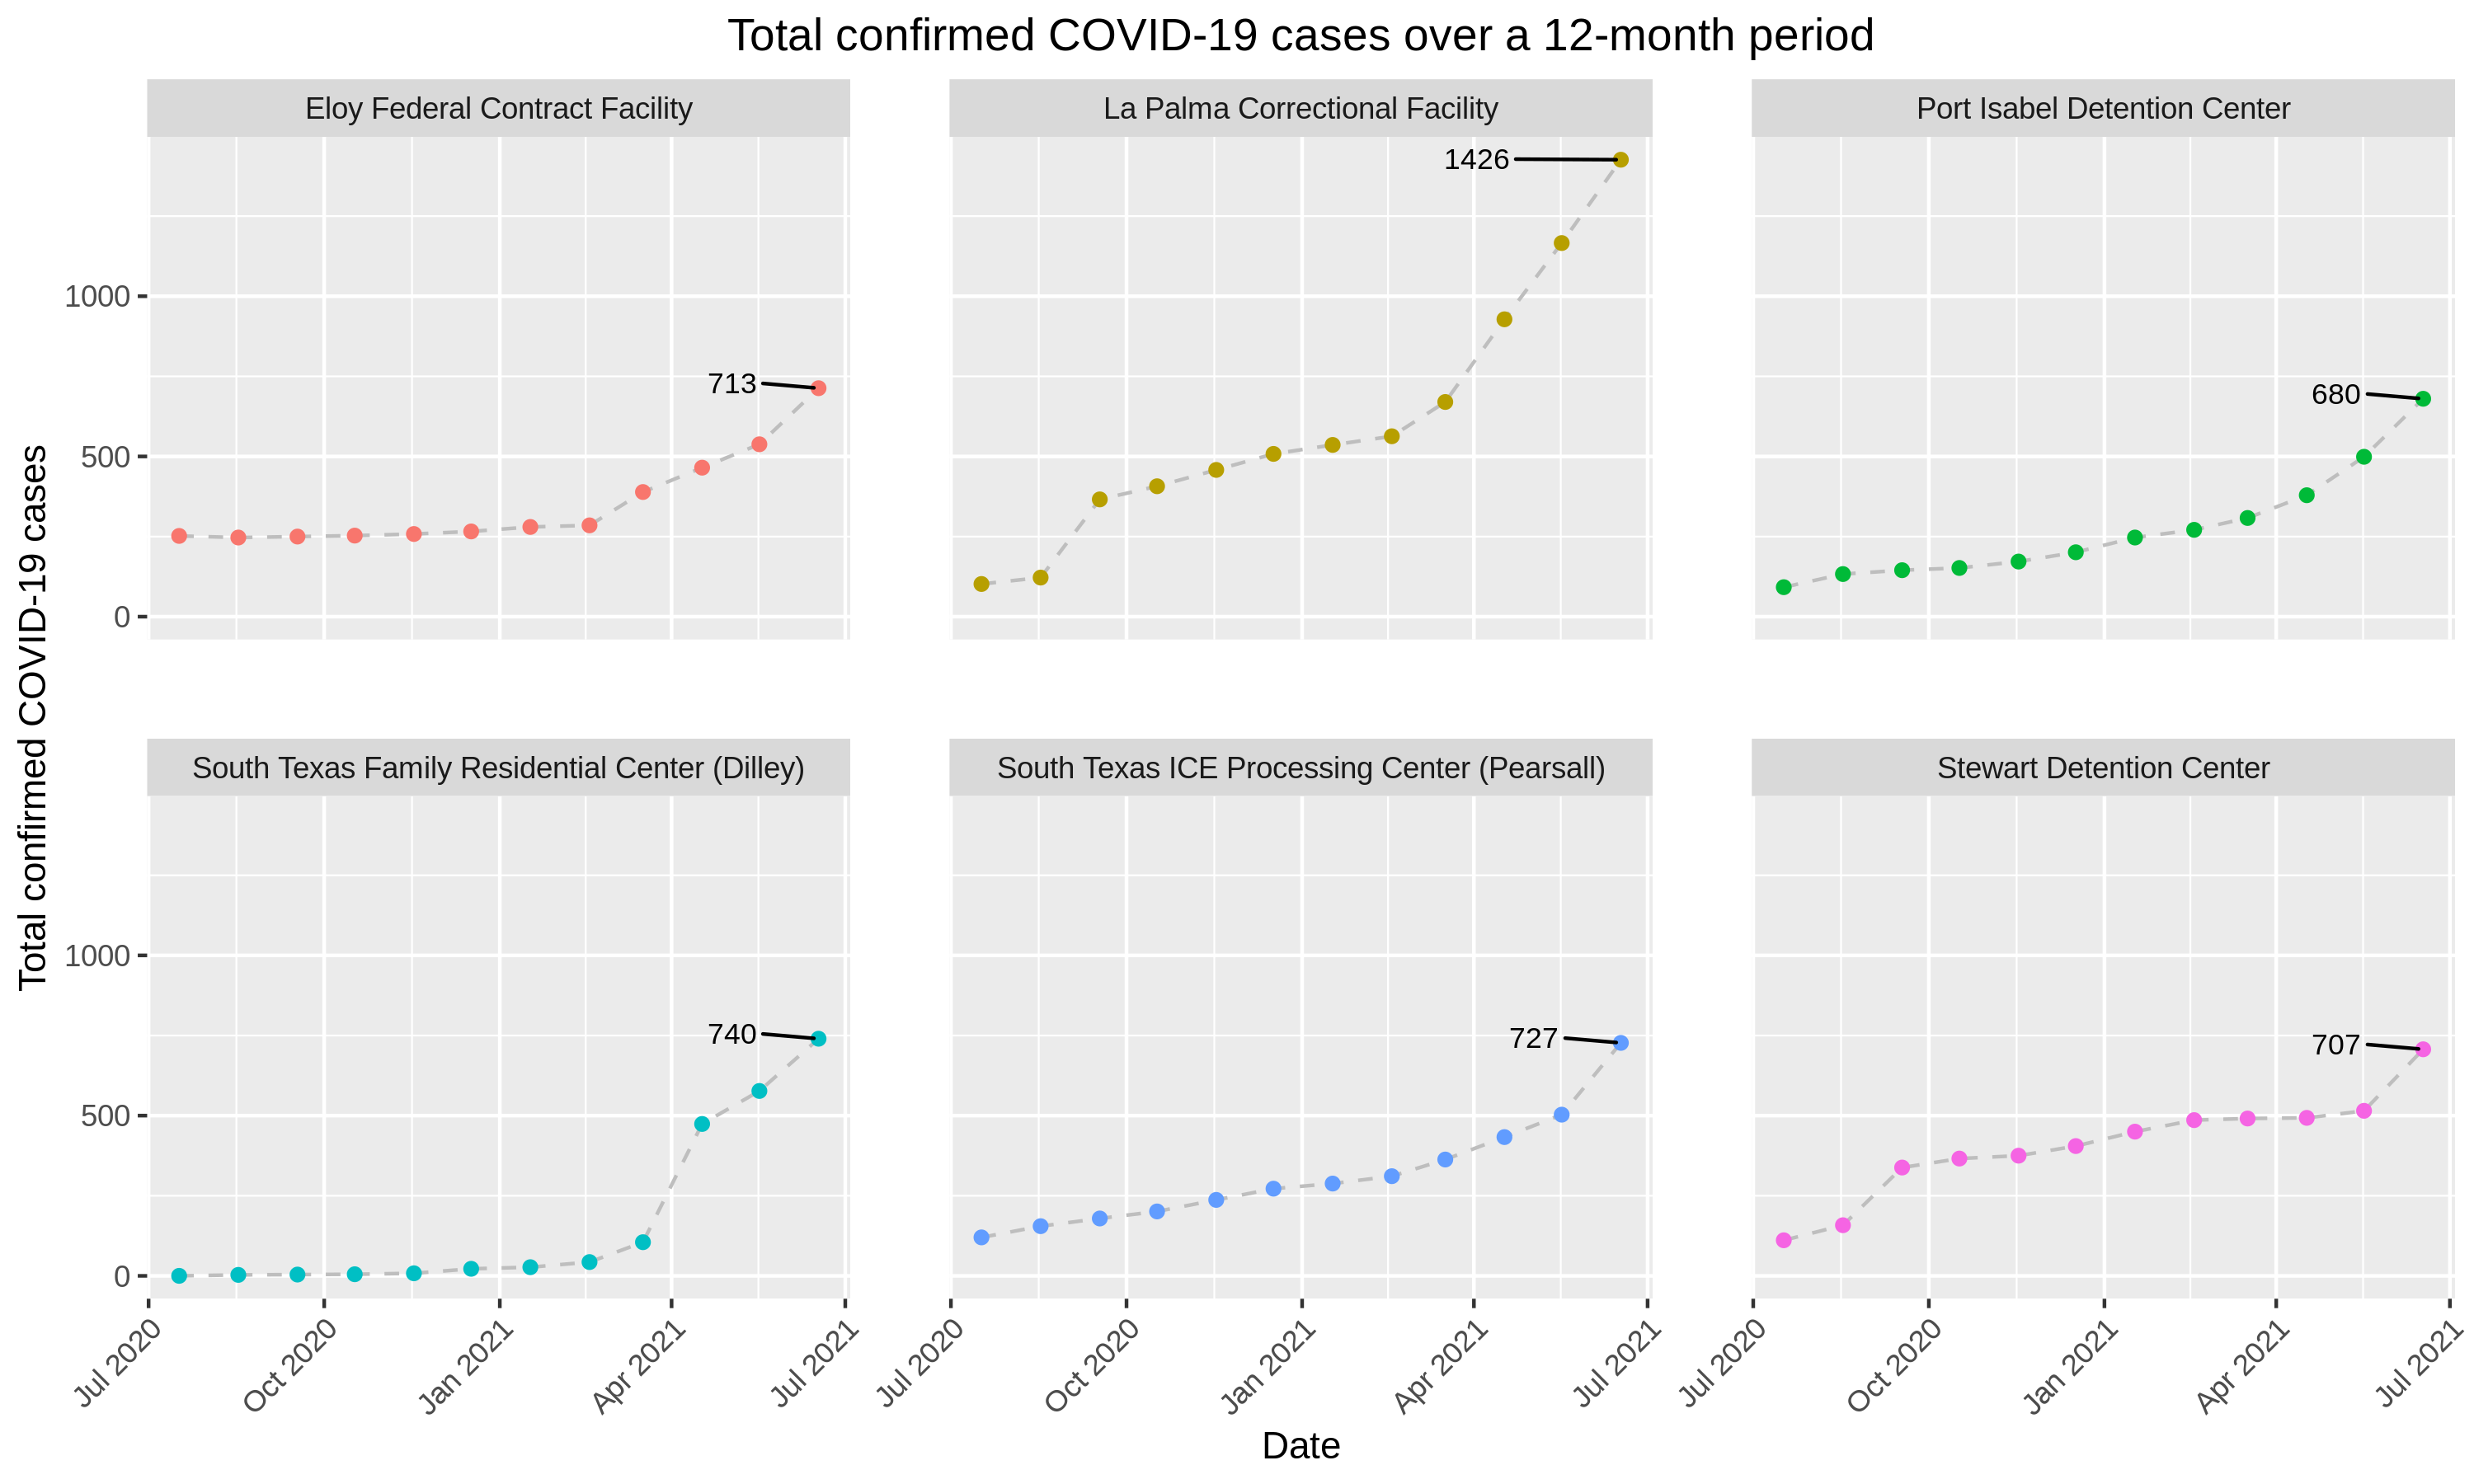

In [107]:
options(repr.plot.width=10, repr.plot.height=6)

p1 = ggplot(ice_df, aes(x=scrapedate, y=fac_inc_positive, color=facility)) 

p1 = p1 + facet_wrap(~facility)

p1 = p1 + geom_line(linetype = "dashed", size = 0.5, color = "grey")

p1 = p1 + geom_point()

p1 = p1 + geom_text_repel(data = ice_df %>% filter(scrapedate == "2021-06-17"),
        hjust = 4,
        nudge_y = 15,
        size = 3,
        color = "black",
        aes(label = fac_inc_positive))

p1 = p1 + labs(title = "Total confirmed COVID-19 cases over a 12-month period",
             x = "Date", 
             y = "Total confirmed COVID-19 cases")

p1 = p1 + theme_grey()

p1 = p1 + theme(axis.text.x = element_text(angle = 45, hjust = 1),
               legend.position = 'none', panel.spacing = unit(2, "lines"),
               plot.title = element_text(hjust = 0.5))

p1

## `Analysis`

##### Distribution of cases over time
> The boxplots created above reveal the changes in variability of the number of confirmed COVID-19 cases across the 6 ICE facilities over a 12-month period. More specifically, there was little variability across the 6 facilities in July and August of 2020. The variability, or spread of data, began to increase in September of 2020 and decrease again around April 2021. Increased variability in this data frame means that there was a greater range, or difference, between the 6 facilities with respect to their total number of confirmed COVID-19 cases. The outlier in May, June, and July 2021 was La Palma Correctional Facility, which began to consistently skew the distribution over cases to the right.

##### Number of cases over time
> The line graph and facetted scatterplot above plot the total number of confirmed COVID-19 cases over a 12-month period. These visualizations add to the data narrative by allowing for a quick comparison of these trends over time across the 6 ICE facilities. From June to July 2021, each facility saw a spike in the total number of cases. Eloy Federal Contract Facility, Port Isabel Detention Center, South Texas ICE Processing Center (Pearsall), and Stewart Detention Center have relatively steady increases in their number of cases. La Palma Correctional Facility saw sharp increases in September 2020 and April 20201. South Texas Family Residential Center (Dilley) had a relatively steady increase or constant number of cases until May 2021, when there was a jump in the number of cases.